In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/chaitanya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Load the data. Replace the path with the path to the csv file on your system
simclr_svm_cat_dog_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_svm_cat_dog_accuracies.csv")
simclr_svm_vehicles_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_svm_vehicles_accuracies.csv")
simclr_svm_clothes_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_svm_clothes_accuracies.csv")


simclr_knn_cat_dog_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_knn_cat_dog_accuracies.csv")
simclr_knn_vehicles_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_knn_vehicles_accuracies.csv")
simclr_knn_clothes_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_knn_clothes_accuracies.csv")

simclr_rf_cat_dog_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_rf_cat_dog_accuracies.csv")
simclr_rf_vehicles_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_rf_vehicles_accuracies.csv")
simclr_rf_clothes_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_rf_clothes_accuracies.csv")

simclr_nn_cat_dog_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_nn_cat_dog_accuracies.csv")
simclr_nn_vehicles_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_nn_vehicles_accuracies.csv")
simclr_nn_clothes_data = pd.read_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_nn_clothes_accuracies.csv")

In [3]:
# Add a column to each dataframe to indicate the dataset
simclr_svm_cat_dog_data["Dataset"] = "Cat Dog"
simclr_svm_vehicles_data["Dataset"] = "Vehicles"
simclr_svm_clothes_data["Dataset"] = "Clothes"

simclr_knn_cat_dog_data["Dataset"] = "Cat Dog"
simclr_knn_vehicles_data["Dataset"] = "Vehicles"
simclr_knn_clothes_data["Dataset"] = "Clothes"

simclr_rf_cat_dog_data["Dataset"] = "Cat Dog"
simclr_rf_vehicles_data["Dataset"] = "Vehicles"
simclr_rf_clothes_data["Dataset"] = "Clothes"

simclr_nn_cat_dog_data["Dataset"] = "Cat Dog"
simclr_nn_vehicles_data["Dataset"] = "Vehicles"
simclr_nn_clothes_data["Dataset"] = "Clothes"

In [4]:
# Concatenate the dataframes
simclr_svm = pd.concat([simclr_svm_cat_dog_data, simclr_svm_vehicles_data, simclr_svm_clothes_data])
simclr_knn = pd.concat([simclr_knn_cat_dog_data, simclr_knn_vehicles_data, simclr_knn_clothes_data])
simclr_rf = pd.concat([simclr_rf_cat_dog_data, simclr_rf_vehicles_data, simclr_rf_clothes_data])
simclr_nn = pd.concat([simclr_nn_cat_dog_data, simclr_nn_vehicles_data, simclr_nn_clothes_data])
simclr_svm.to_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_svm_accuracies.csv", index=False)
simclr_knn.to_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_knn_accuracies.csv", index=False)
simclr_rf.to_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_rf_accuracies.csv", index=False)
simclr_nn.to_csv("/home/chaitanya/Academics/Research and Development Files/plotting/accuracies/simclr/simclr_nn_accuracies.csv", index=False)

In [5]:
# Add a column to each dataframe to indicate the classifier
simclr_svm['classifier'] = 'Support Vector Machine'
simclr_knn['classifier'] = 'K-Nearest Neighbors'
simclr_rf['classifier'] = 'Random Forest'
simclr_nn['classifier'] = 'Neural Network'
simclr_accuracies = pd.concat([simclr_svm, simclr_knn, simclr_rf, simclr_nn], ignore_index=True)

In [6]:
# Mapping for the augmentations
mapping_augmentations = {
    'simclr_model_center_cropping': 'Center Cropping',
    'simclr_model_random_cropping': 'Random Cropping',
    'simclr_model_color_jitter': 'Color Jitter',
    'simclr_model_random_flipping': 'Random Flipping',
    'simclr_model_random_perspective': 'Random Perspective',
    'simclr_model_random_rotation': 'Random Rotation',
    'simclr_model_random_grayscale': 'Random Grayscale',
    'simclr_model_gaussian_blur': 'Gaussian Blur',
    'simclr_model_random_invert': 'Random Invert',
    'simclr_model_random_erasing': 'Random Erasing'
}

mapping_datasets = {
    "Cat Dog":"Cat and Dog",
    "Vehicles": "Vehicles",
    "Clothes": "Clothing"
}

columns = {
    'accuracy_train': 'Training accuracy',
    'accuracy_test': 'Testing accuracy',
    'cross_val_score': 'Cross Validation accuracies'
}
simclr_accuracies['augmentation'] = simclr_accuracies['augmentation'].replace(mapping_augmentations)
simclr_accuracies['Dataset'] = simclr_accuracies['Dataset'].replace(mapping_datasets)
simclr_accuracies = simclr_accuracies.rename(columns=columns)

In [7]:
simclr_new_accuracies = simclr_accuracies.groupby(['Dataset', 'augmentation', 'classifier'])['Testing accuracy'].apply(list).reset_index()
simclr_new_accuracies = simclr_new_accuracies.explode('Testing accuracy').reset_index(drop=True)

In [8]:
def plot_point_plot_by_classifiers(data, title):

    """Plot a point plot for the accuracies of different classifiers for different augmentations"""
    
    plt.figure(figsize=(20, 10))
    sns.set_palette("muted")
    sns.pointplot(data=data, x='augmentation', y='Testing accuracy', hue='classifier')
    plt.xlabel('Augmentation', fontsize=22)
    plt.ylabel('Testing accuracy', fontsize=22)
    plt.ylim(0, 1.1)
    plt.xticks(fontsize=18, rotation=-60, ha='left') 
    plt.yticks(fontsize=18)
    plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
    plt.legend(title='Classifers', loc='upper right', fontsize=16)
    plt.savefig(f'{title}.pdf', bbox_inches='tight')
    plt.show()

In [9]:
def plot_point_plot_by_datasets(data, title):
    
    """Plot a point plot for the accuracies of different datasets for different augmentations"""

    plt.figure(figsize=(20, 10))
    sns.set_palette("muted")
    sns.pointplot(data=data, x='augmentation', y='Testing accuracy', hue='Dataset')
    plt.xlabel('Augmentation', fontsize=22)
    plt.ylabel('Testing accuracy', fontsize=22)
    plt.ylim(0, 1.1)
    plt.xticks(fontsize=18, rotation=-60, ha='left') 
    plt.yticks(fontsize=18)
    plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
    plt.legend(title='Datasets', loc='upper right', fontsize=16)
    plt.savefig(f'{title}.pdf', bbox_inches='tight')
    plt.show()

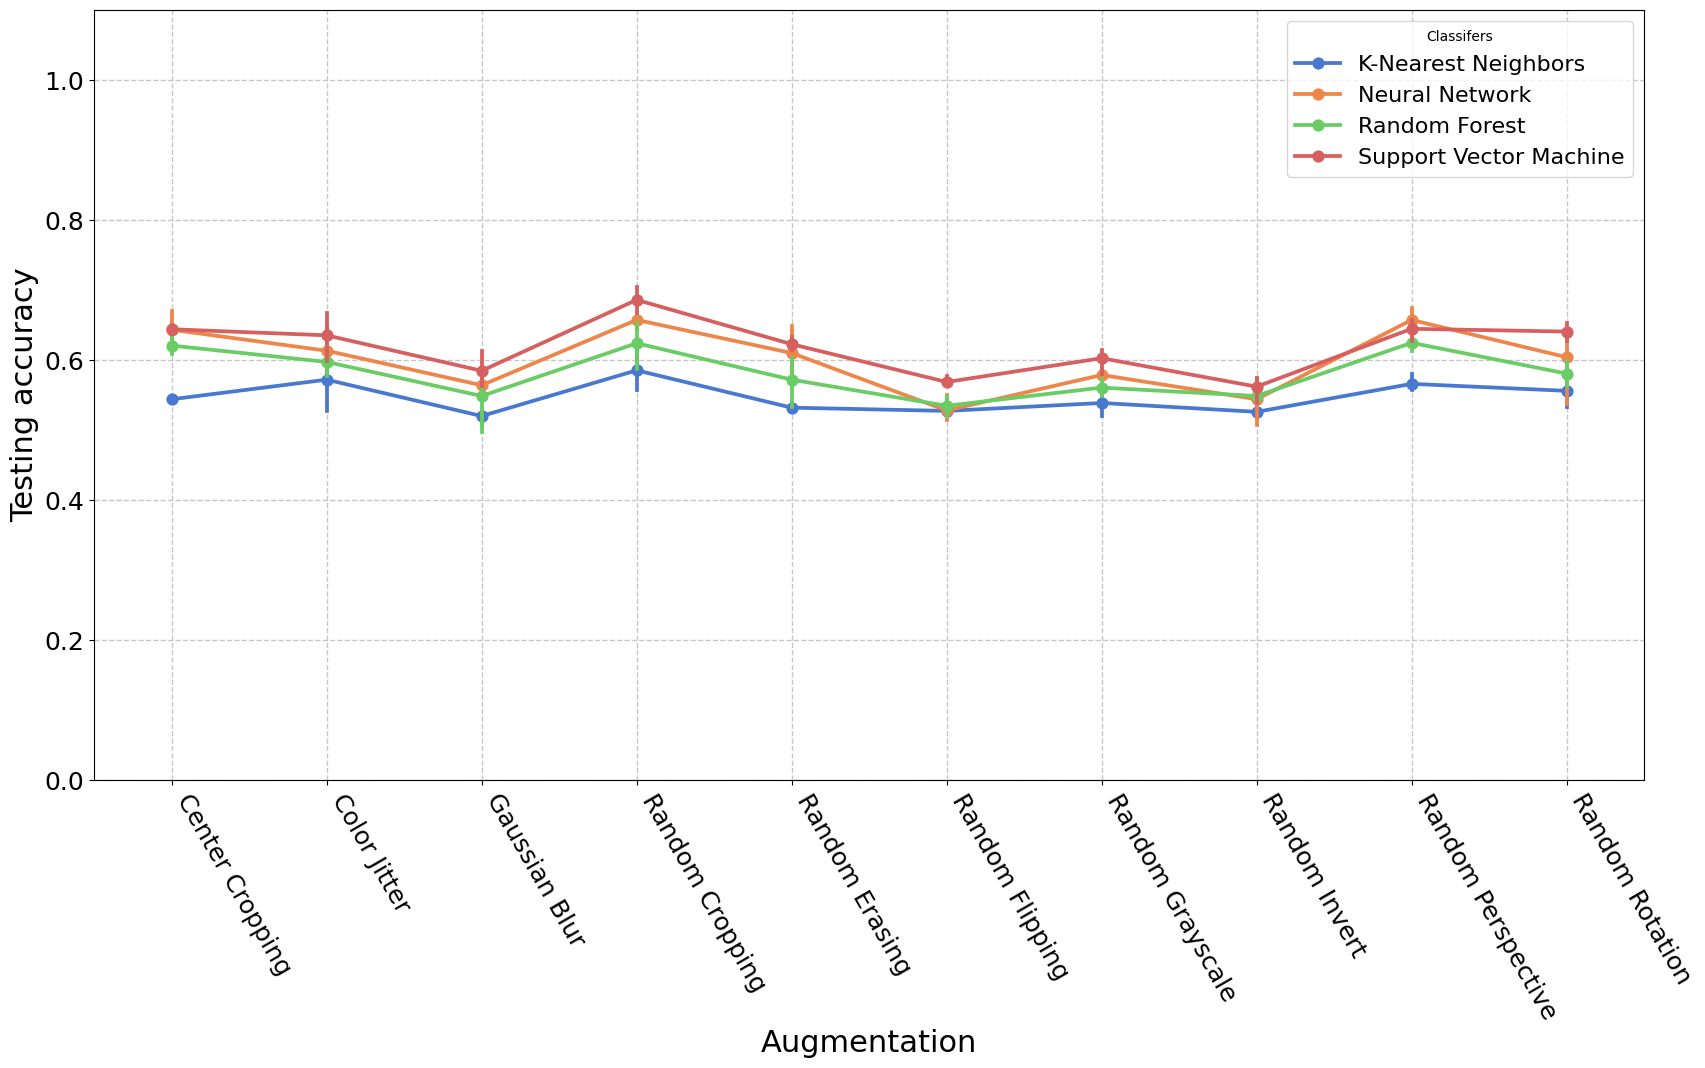

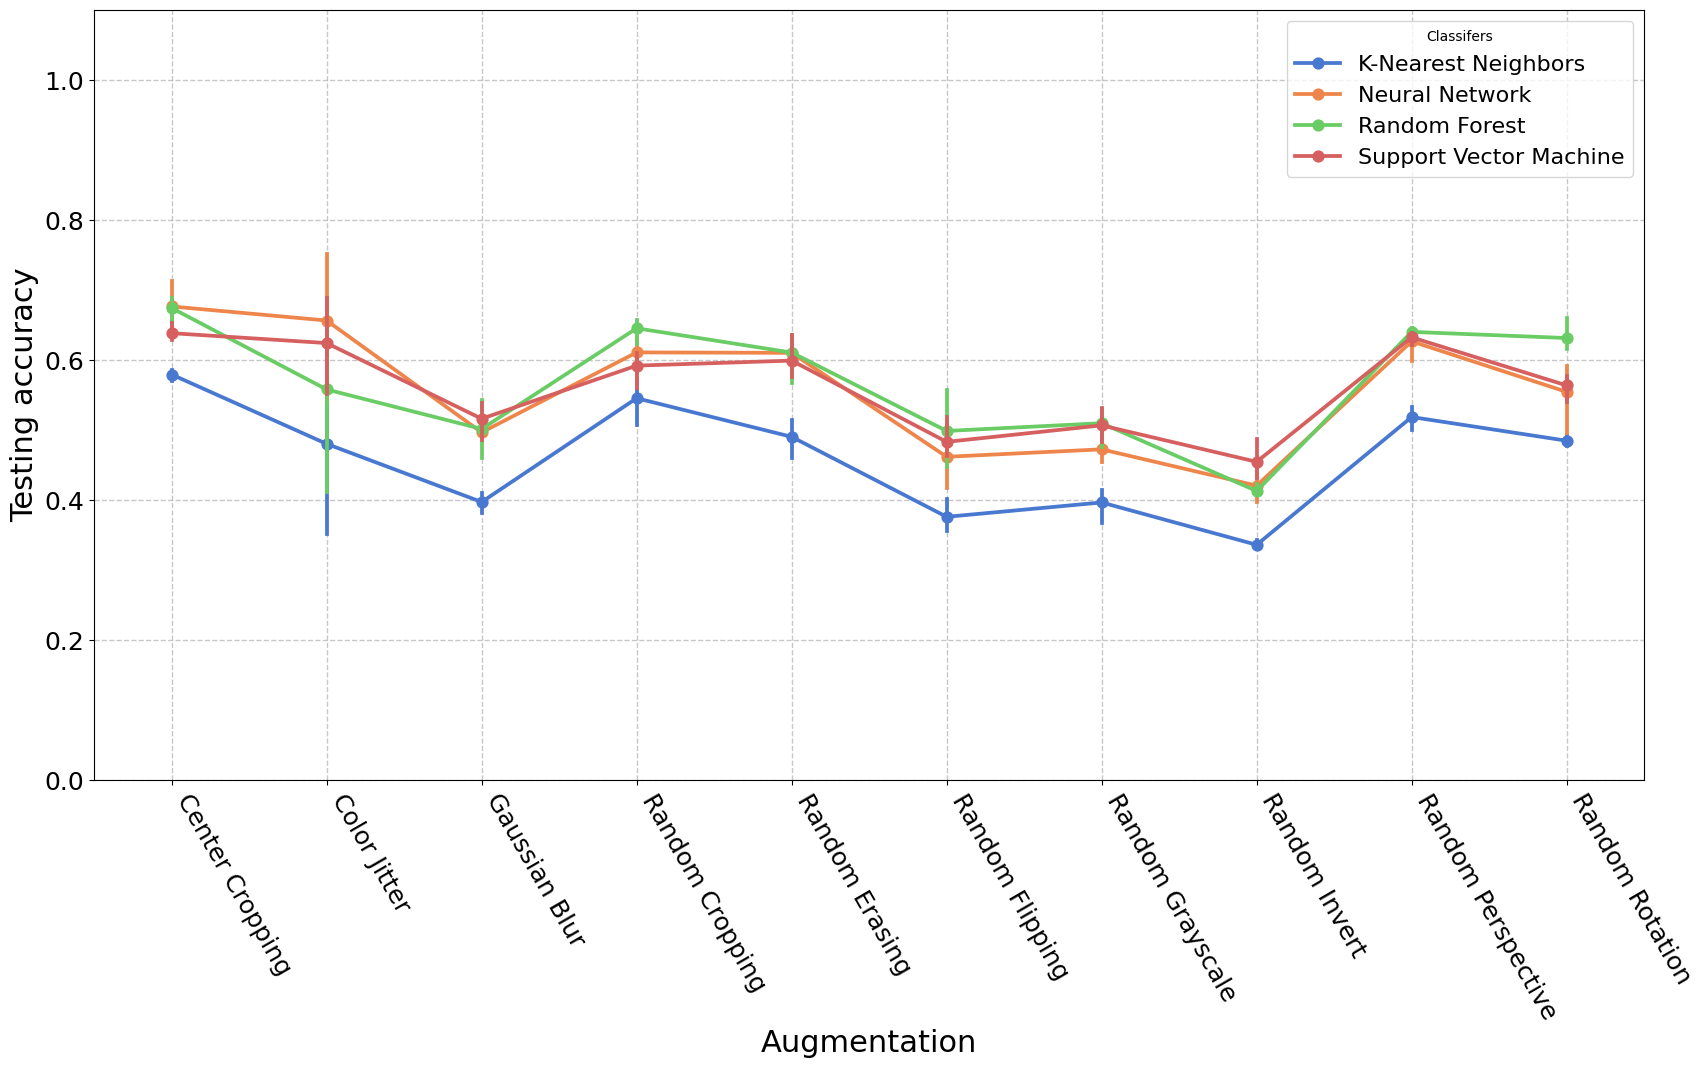

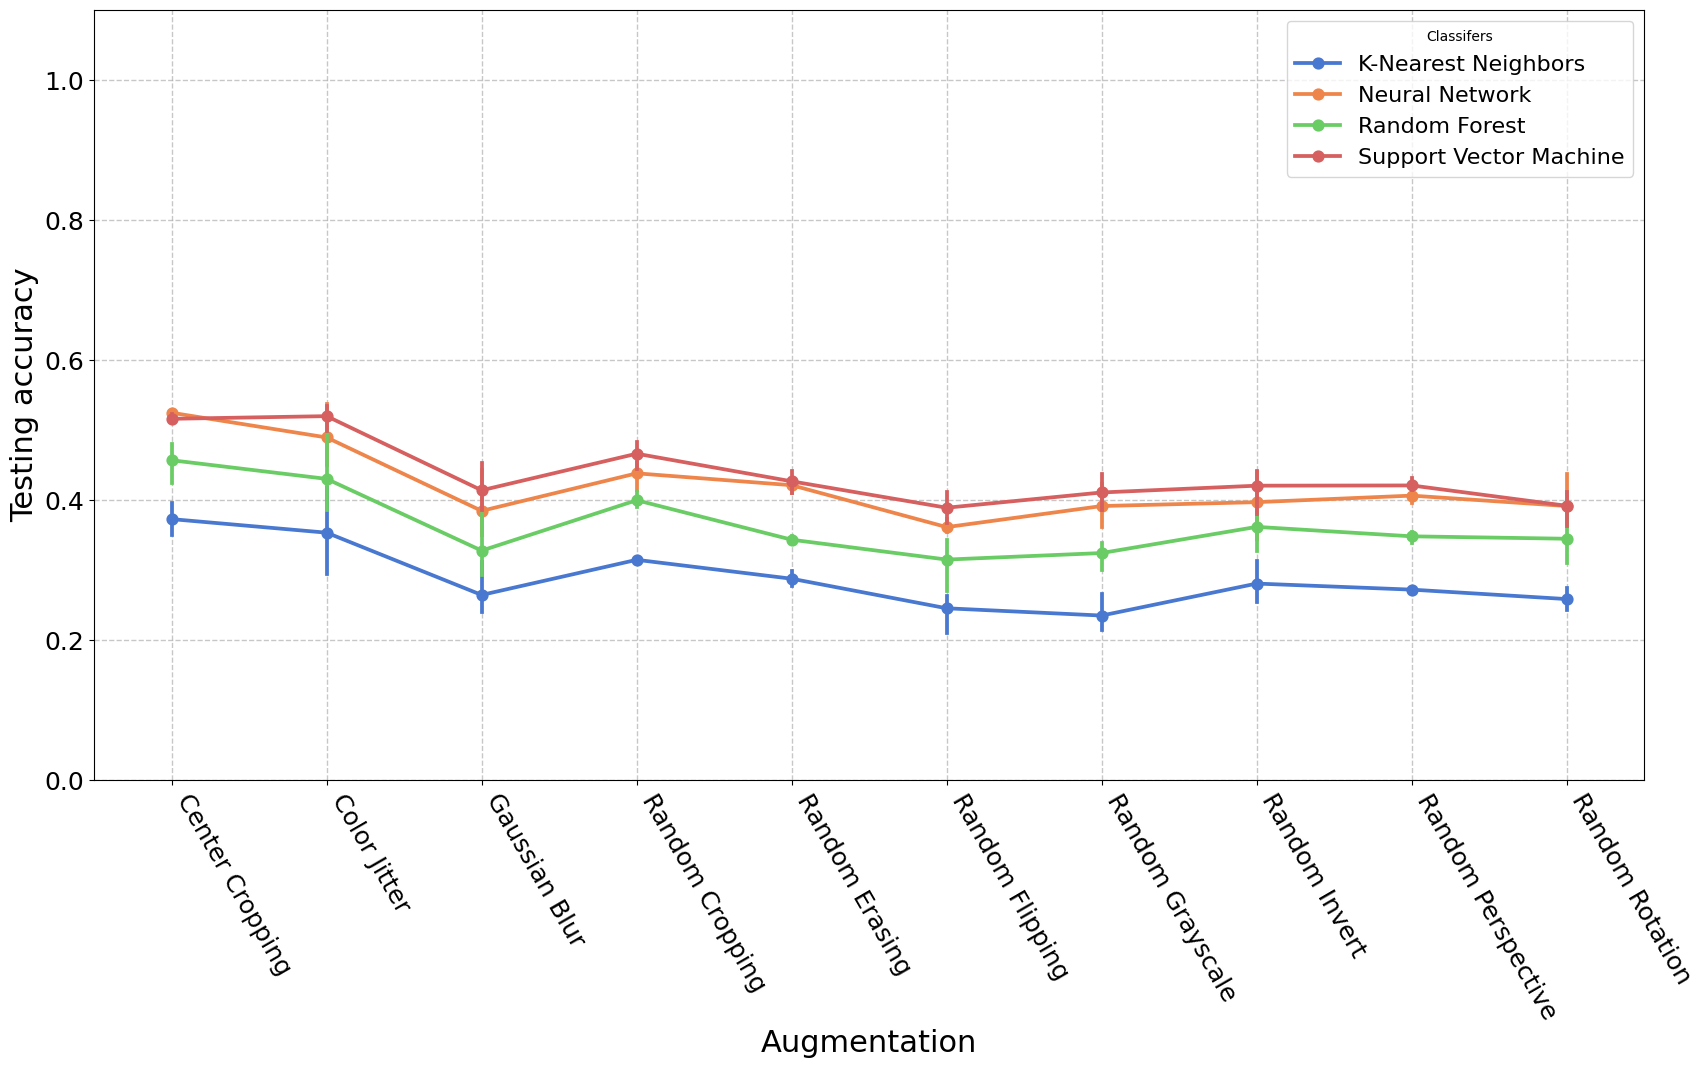

In [10]:
plot_point_plot_by_classifiers(simclr_new_accuracies[simclr_new_accuracies['Dataset'] == 'Cat and Dog'], 'SimCLR model classification accuracies on Cat and Dog dataset')
plot_point_plot_by_classifiers(simclr_new_accuracies[simclr_new_accuracies['Dataset'] == 'Vehicles'], 'SimCLR model classification accuracies on Vehicles dataset')
plot_point_plot_by_classifiers(simclr_new_accuracies[simclr_new_accuracies['Dataset'] == 'Clothing'], 'SimCLR model classification accuracies on Clothing dataset')

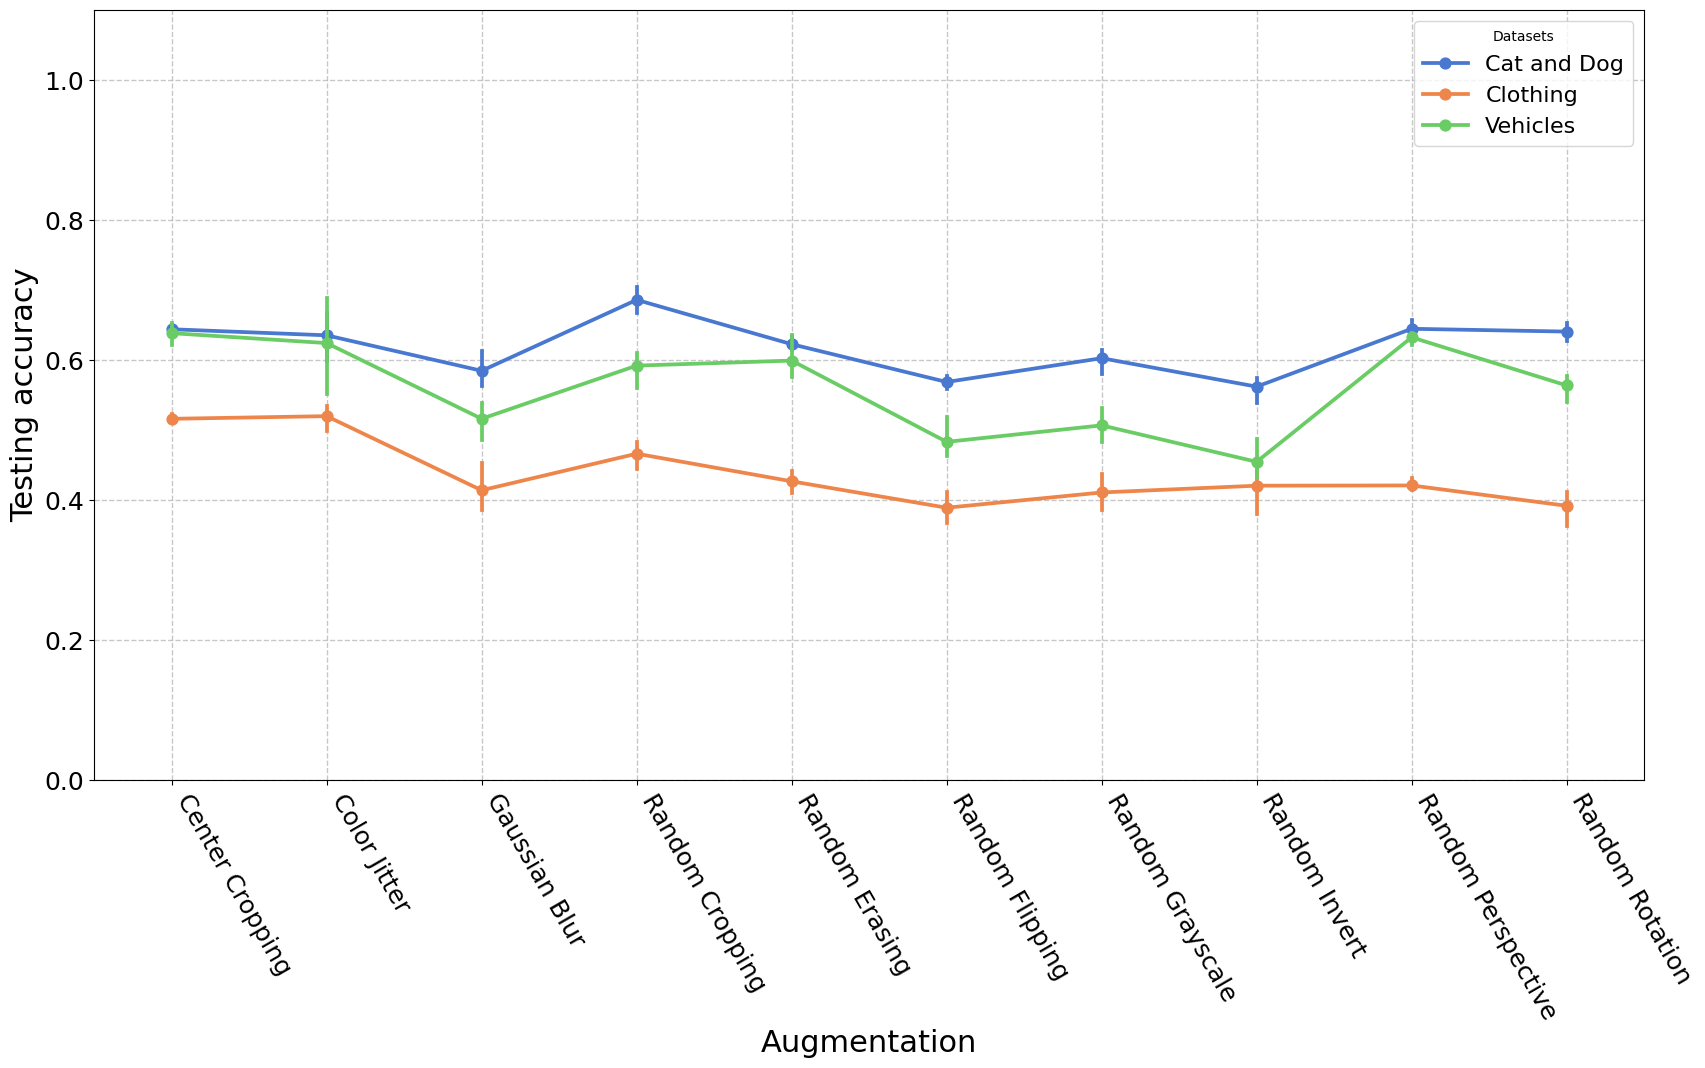

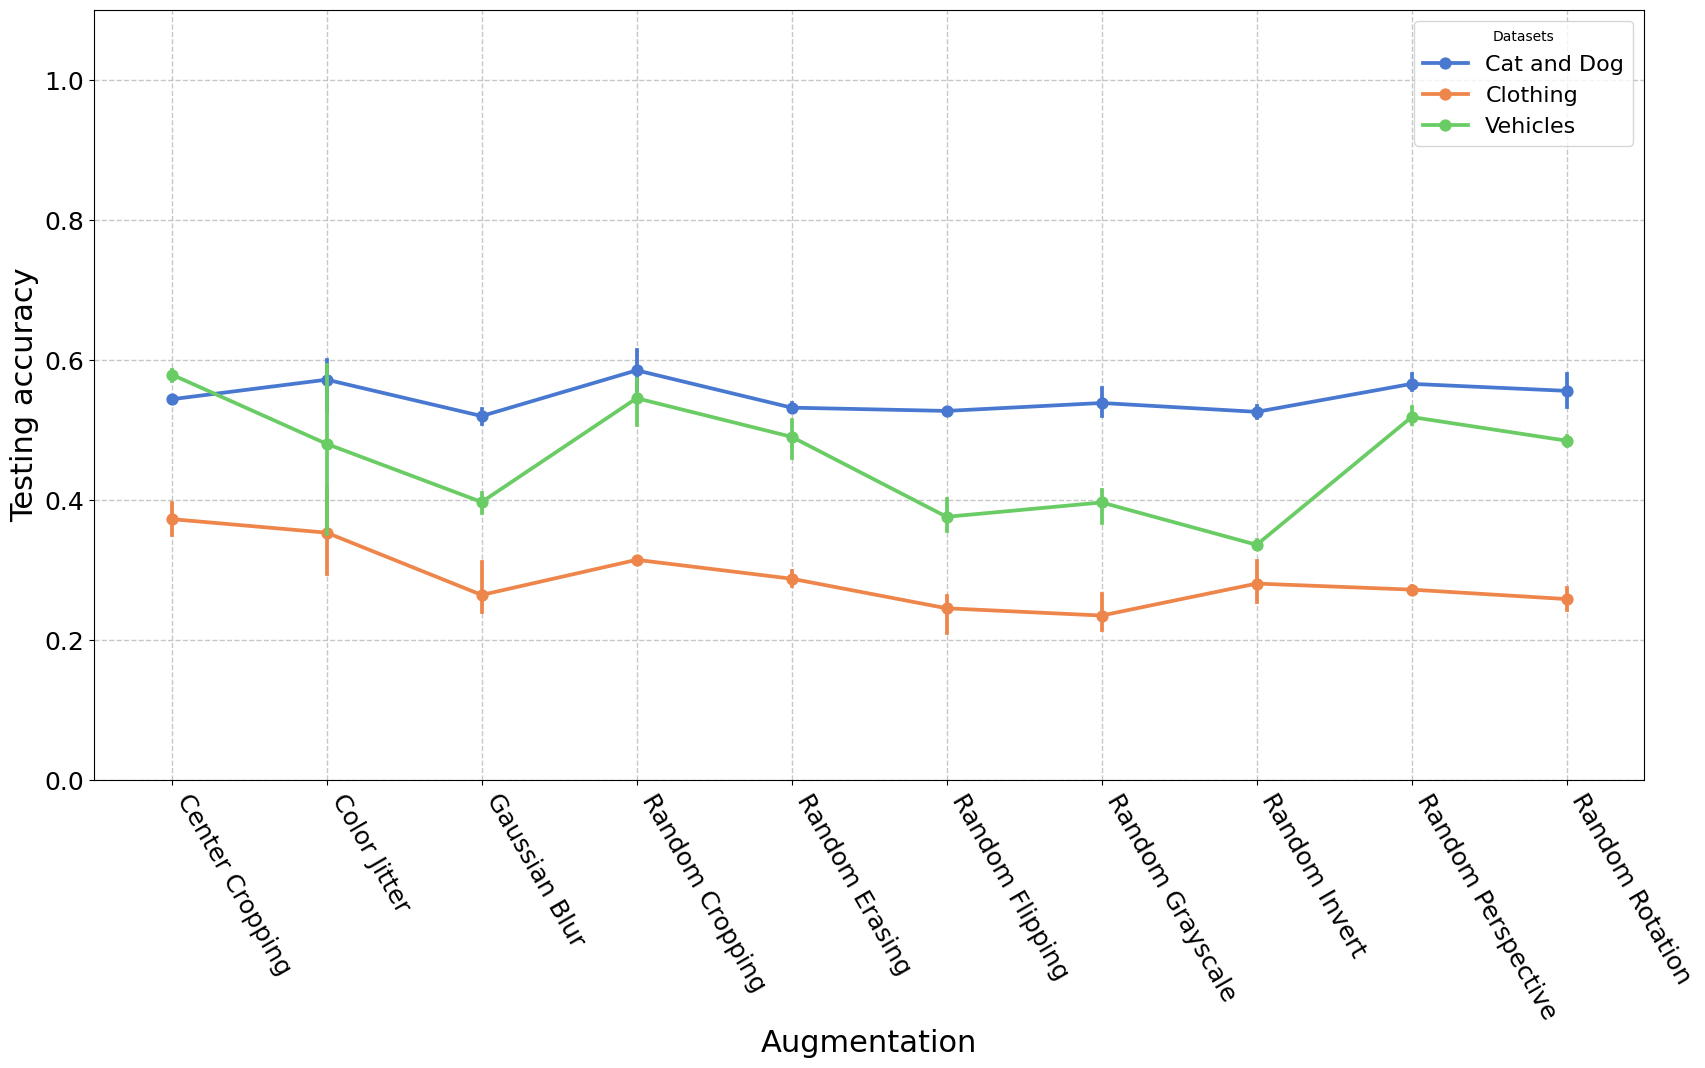

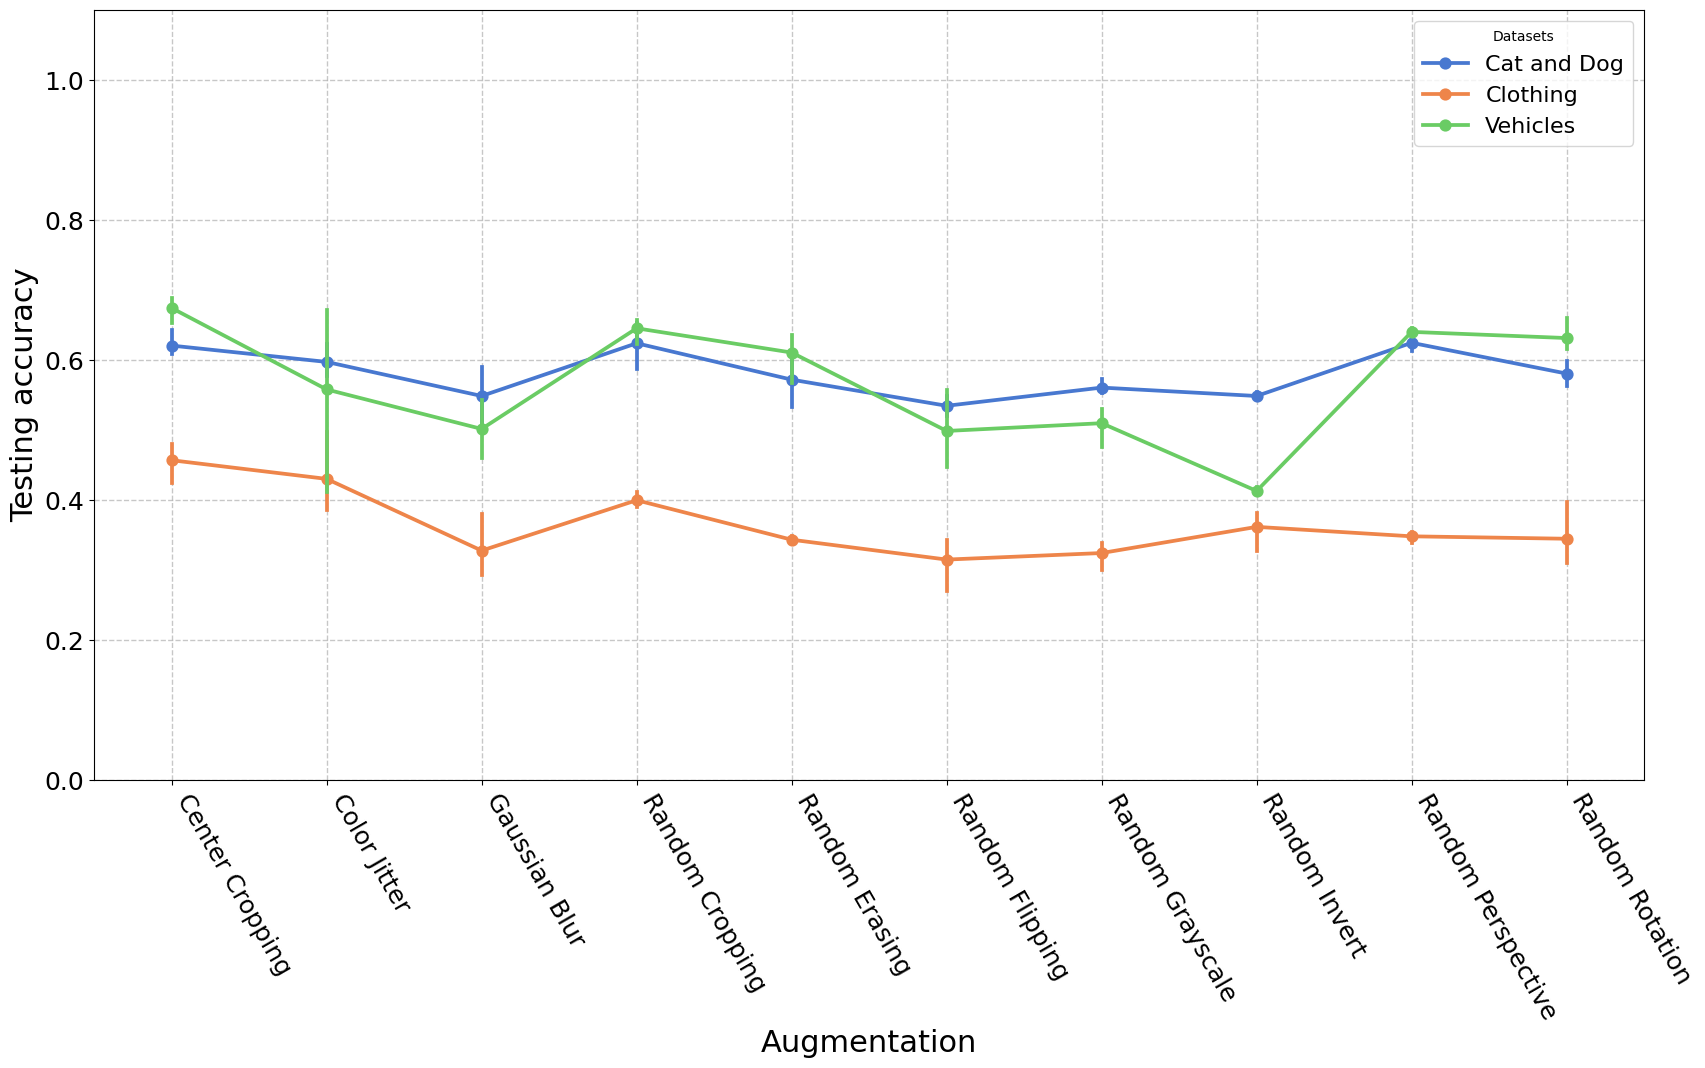

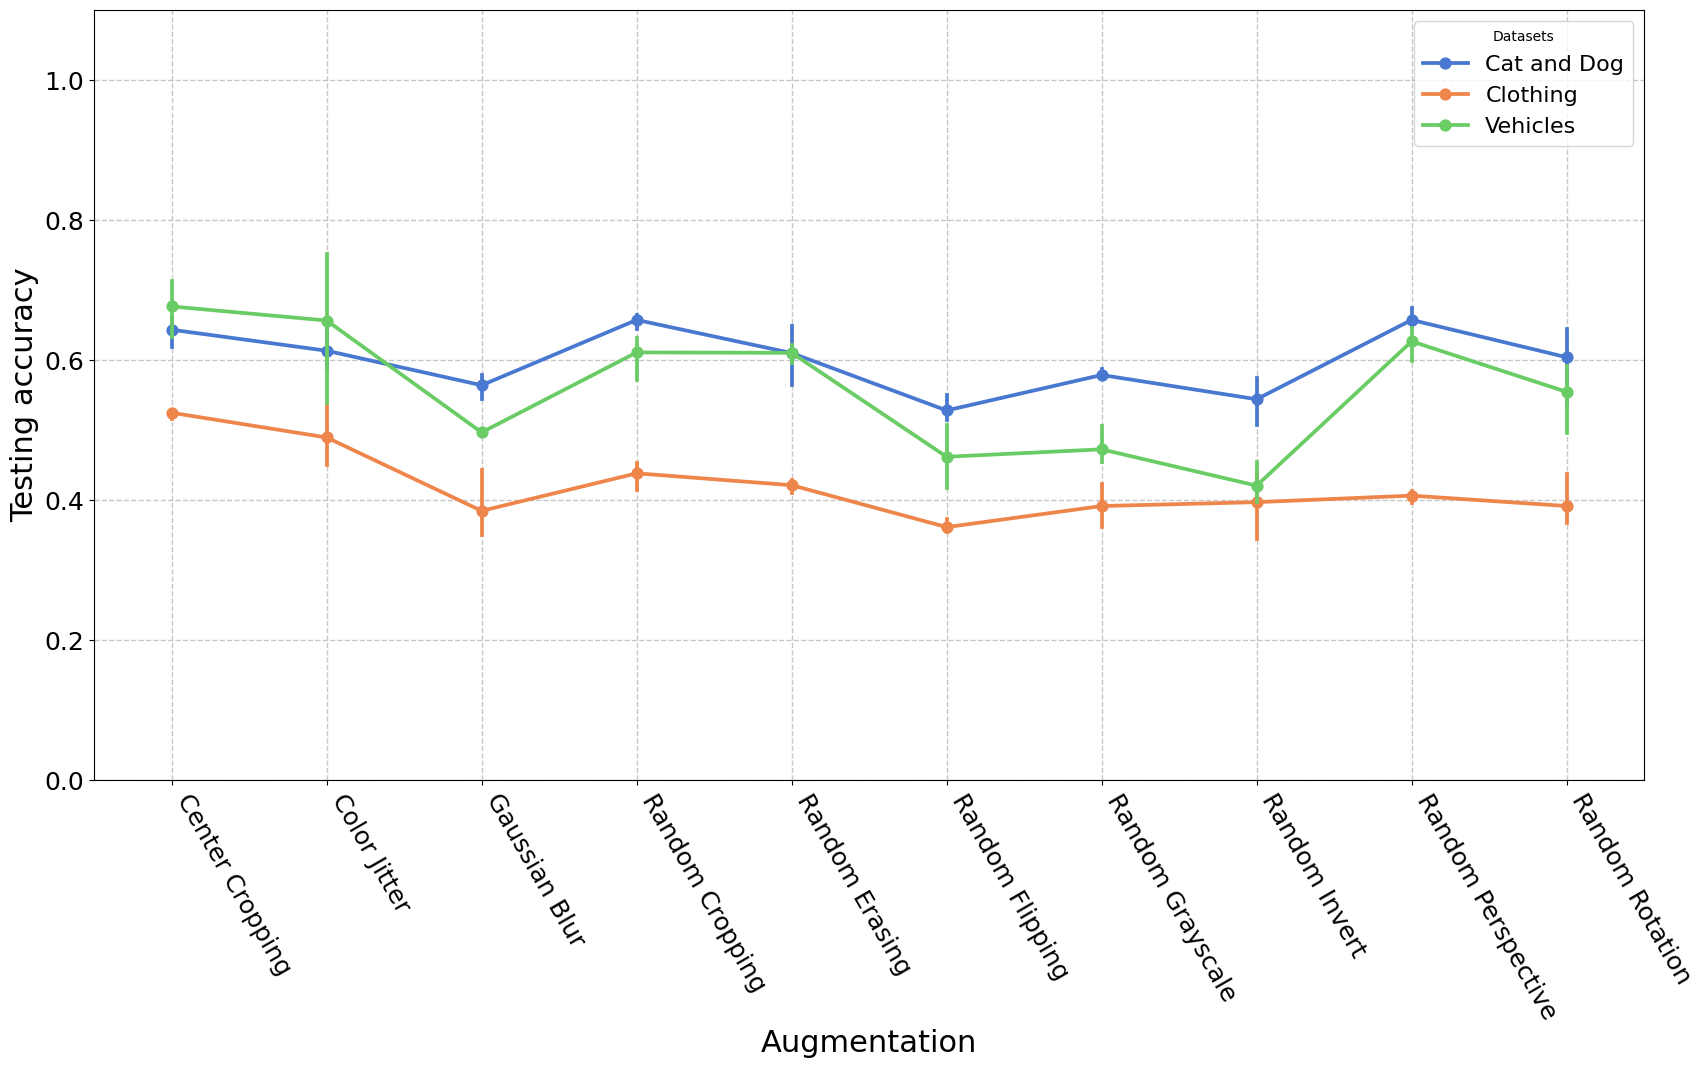

In [11]:
plot_point_plot_by_datasets(simclr_new_accuracies[simclr_new_accuracies['classifier'] == 'Support Vector Machine'], 'SimCLR model Support Vector Machine accuracies by datasets')
plot_point_plot_by_datasets(simclr_new_accuracies[simclr_new_accuracies['classifier'] == 'K-Nearest Neighbors'], 'SimCLR model K-Nearest Neighbours accuracies by datasets')
plot_point_plot_by_datasets(simclr_new_accuracies[simclr_new_accuracies['classifier'] == 'Random Forest'], 'SimCLR model Random Forest accuracies by datasets')
plot_point_plot_by_datasets(simclr_new_accuracies[simclr_new_accuracies['classifier'] == 'Neural Network'], 'SimCLR model Neural network classifier accuracies by datasets')

In [12]:
# plt.figure(figsize=(20, 10))
# sns.pointplot(data=simclr_new_accuracies[simclr_new_accuracies['dataset']=='Clothing'], x='augmentation', y='Testing accuracy', hue='classifier')

# plt.ylim(0, 1.1)

In [13]:
# def plot_metrics_for_classifiers(simclr_accuracies):
#     datasets = ["Cat and Dog", "Vehicles", "Clothing"]
#     classifiers = ["Support Vector Machine", "Random Forest", "K-Nearest Neighbors", "Neural Network"]
#     metrics = ["Training accuracy", "Testing accuracy"]
    
#     for classifier in classifiers:
#         for dataset_name in datasets:
#             fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)  
            

#             for idx, metric in enumerate(metrics):
#                 ax = axes[idx]
#                 data = simclr_accuracies[(simclr_accuracies["classifier"] == classifier) & 
#                                          (simclr_accuracies["dataset"] == dataset_name)]
#                 bar_plot = sns.barplot(ax=ax, x="seed", y=metric, hue="augmentation", data=data)
#                 sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.8))
#                 ax.set_title(f'{metric.capitalize()}')
#                 ax.grid(True, linestyle='dashed')
#                 legend = ax.get_legend()
#                 legend.set_title("Augmentations")
#                 ax.set(xlabel=None)
#                 ax.set(ylabel=None)
#                 ax.set_ylim(0, 1.1) 
#                 if idx < 1:
#                     ax.get_legend().remove()
                

#             fig.text(0.5, 0.01, 'Seed', ha='center', fontsize=14, weight='bold') 
#             fig.text(0.01, 0.5, 'Accuracy', va='center', rotation='vertical', fontsize=14, weight='bold')
#             plt.suptitle(f'{classifier} Classifier - {dataset_name} Dataset', fontsize=16, weight='bold')
#             plt.tight_layout(pad=4.0)  
#             title = f'{classifier}_{dataset_name}_simclr.pdf'
#             path = f"/home/chaitanya/Academics/Research and Development/plotting/saved_plots/simclr/{title}.pdf"
#             # plt.savefig(path)        
#             plt.show()

In [14]:
# plot_metrics_for_classifiers(simclr_accuracies)